# Student Scores: Modeling

# Load Required Python Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/tiffanyflor/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


**Locate and print current working directory and parent directory.**

In [2]:
path = os.getcwd()
parent = os.path.dirname(path)
print(path)
print(parent)

/Users/tiffanyflor/Dropbox/MyProjects/Student Scores/notebooks
/Users/tiffanyflor/Dropbox/MyProjects/Student Scores


**Print contents of data/interim.**

In [3]:
os.listdir(parent+'/data/interim')

['total_student_scores_without_dummies.csv',
 'cleaned_student_scores.csv',
 'student_scores_no_outliers.csv',
 'total_student_scores_dummies.csv',
 '.ipynb_checkpoints']

# Load Data

In [4]:
df = pd.read_csv(parent+'/data/interim/total_student_scores_dummies.csv',index_col=0)

In [5]:
df.head()

,test preparation course,education,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,Grade
0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,pass
1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,pass
2,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,pass
3,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,fail
4,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,pass


In [6]:
df.shape

(5000, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   test preparation course                         5000 non-null   int64 
 1   education                                       5000 non-null   int64 
 2   gender_female                                   5000 non-null   int64 
 3   gender_male                                     5000 non-null   int64 
 4   race/ethnicity_group A                          5000 non-null   int64 
 5   race/ethnicity_group B                          5000 non-null   int64 
 6   race/ethnicity_group C                          5000 non-null   int64 
 7   race/ethnicity_group D                          5000 non-null   int64 
 8   race/ethnicity_group E                          5000 non-null   int64 
 9   parental level of education_associate's degree  5000 

# Split into Train and Test Data

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('Grade',axis=1)
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [9]:
# examine data details
X.describe().T

,count,mean,std,min,25%,50%,75%,max
test preparation course,5000.0,0.3422,0.474494,0.0,0.0,0.0,1.0,1.0
education,5000.0,0.6168,0.486215,0.0,0.0,1.0,1.0,1.0
gender_female,5000.0,0.5024,0.500044,0.0,0.0,1.0,1.0,1.0
gender_male,5000.0,0.4976,0.500044,0.0,0.0,0.0,1.0,1.0
race/ethnicity_group A,5000.0,0.0828,0.275607,0.0,0.0,0.0,0.0,1.0
race/ethnicity_group B,5000.0,0.1952,0.396394,0.0,0.0,0.0,0.0,1.0
race/ethnicity_group C,5000.0,0.3190,0.466136,0.0,0.0,0.0,1.0,1.0
race/ethnicity_group D,5000.0,0.2620,0.439767,0.0,0.0,0.0,1.0,1.0
race/ethnicity_group E,5000.0,0.1410,0.348056,0.0,0.0,0.0,0.0,1.0
parental level of education_associate's degree,5000.0,0.1938,0.395314,0.0,0.0,0.0,0.0,1.0


# Model

In [10]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [11]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.68


In [12]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

test preparation course                           0.201860
lunch_standard                                    0.121639
lunch_free/reduced                                0.112129
race/ethnicity_group E                            0.072663
education                                         0.055794
parental level of education_master's degree       0.049570
race/ethnicity_group B                            0.045468
race/ethnicity_group C                            0.040495
gender_female                                     0.040484
gender_male                                       0.039746
race/ethnicity_group D                            0.039542
race/ethnicity_group A                            0.038419
parental level of education_some college          0.031800
parental level of education_some high school      0.031141
parental level of education_bachelor's degree     0.030542
parental level of education_associate's degree    0.028293
parental level of education_high school           0.0204

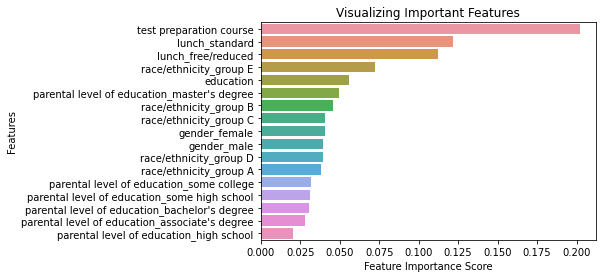

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint

In [15]:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

In [21]:
# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(X_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.34177907893939885,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.053401936513099456,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 61,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [22]:
# generate predictions using the best-performing model
predictions = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.667


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# View confusion matrix for test data and predictions
confusion_matrix(y_test, predictions)

array([[390, 144],
       [189, 277]])

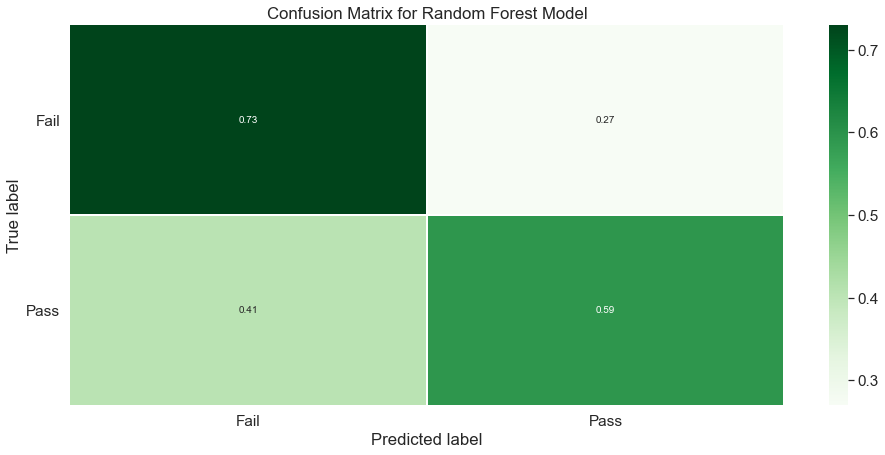

In [24]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Fail','Pass']
tick_marks = np.arange(len(class_names))+0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [25]:
# View the classification report for test data and predictions
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        fail       0.67      0.73      0.70       534
        pass       0.66      0.59      0.62       466

    accuracy                           0.67      1000
   macro avg       0.67      0.66      0.66      1000
weighted avg       0.67      0.67      0.67      1000

